In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=281731 sha256=28f216df380cb95cb72bc98f3ce6bc4a074c58e37da721acbc1e09836d0bc270
  Stored in directory: /afs/cs.pitt.edu/usr0/ars539/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [3]:
import yfinance as yf

numerical_df = yf.download('AMZN', "2015-10-01", "2020-12-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
import yfinance as yf
import pandas as pd

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()[:period+1]
    avg_loss = loss.rolling(window=period, min_periods=period).mean()[:period+1]
    
    for i in range(period+1, len(data)):
        avg_gain = pd.concat(
            [avg_gain, 
             pd.Series([(avg_gain.iloc[-1] * (period - 1) + gain.iloc[i]) / period], index=[gain.index[i]])
            ]
        )
        avg_loss = pd.concat(
            [avg_loss,
                pd.Series([(avg_loss.iloc[-1] * (period - 1) + loss.iloc[i]) / period], index=[loss.index[i]])
            ]
        )

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

n_days = 50
# sp500_tickers = sorted(sp500_company_tickers_in_kaggle_df.split(" "))

# for comp in sp500_tickers:
numerical_df['RSI'] = calculate_rsi(numerical_df['Close'], 50)
numerical_df['EMA'] = numerical_df['Close'].ewm(span=n_days, adjust=False).mean()
numerical_df['SMA'] = numerical_df['Close'].rolling(window=14).mean()
temp_12 = numerical_df['Close'].ewm(span=12, adjust=False).mean()
temp_26 = numerical_df['Close'].ewm(span=26, adjust=False).mean()
numerical_df['MACD'] = temp_12 - temp_26

In [5]:
numerical_df =  numerical_df[numerical_df.index >= pd.Timestamp(2016, 1, 1)]

In [8]:
numerical_df = numerical_df.drop(columns='Adj Close')

In [9]:
X, y = numerical_df.drop(columns=['Close']), numerical_df.Close.values
X.shape, y.shape

((1258, 8), (1258,))

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

In [11]:
y_trans

array([[0.05080377],
       [0.04975438],
       [0.04938053],
       ...,
       [0.91883926],
       [0.93131398],
       [0.91945904]])

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB ? eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 13.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 7.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.7 MB/s eta 0:00:00


In [7]:
!pip install keras

In [ ]:
# def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
#     X, y = list(), list() # instantiate X and y
#     for i in range(len(input_sequences)):
#         # find the end of the input, output sequence
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out - 1
#         # check if we are beyond the dataset
#         if out_end_ix > len(input_sequences): break
#         # gather input and output of the pattern
#         seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
#         X.append(seq_x), y.append(seq_y)
#     return np.array(X), np.array(y)

# X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
# print(X_ss.shape, y_mm.shape)

[*********************100%%**********************]  1 of 1 completed


Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_44      │ (None, 5, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ input_layer_44[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_403         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_246 (Add)       │ (None, 5, 5)      │          0 │ dropout_403[0][0… │
│                     │                   │            │ input_layer_44[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_246[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_246 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_404         │ (None, 5, 3)      │          0 │ conv1d_246[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_247 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_404[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_247 (Add)       │ (None, 5, 5)      │          0 │ conv1d_247[0][0], │
│                     │                   │            │ add_246[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_247[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_406         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_248 (Add)       │ (None, 5, 5)      │          0 │ dropout_406[0][0… │
│                     │                   │            │ add_247[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_248[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_248 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_407         │ (None, 5, 3)      │          0 │ conv1d_248[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_249 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_407[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 2147.9932 - mape: 119.9197 - mean_squared_error: 2147.9932 - mean_squared_error_1: 2147.9932 - val_loss: 4637.5376 - val_mape: 94.7867 - val_mean_squared_error: 4637.5376 - val_mean_squared_error_1: 4637.5376
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 992.8849 - mape: 77.4012 - mean_squared_error: 992.8849 - mean_squared_error_1: 992.8849 - val_loss: 2003.9753 - val_mape: 60.8051 - val_mean_squared_error: 2003.9753 - val_mean_squared_error_1: 2003.9753
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 320.3434 - mape: 38.9047 - mean_squared_error: 320.3434 - mean_squared_error_1: 320.3434 - val_loss: 500.8549 - val_mape: 26.6475 - val_mean_squared_error: 500.8549 - val_mean_squared_error_1: 500.8549
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 166.8164 - mape: 29.7910 - mean_squared_error: 166.8164 - mean_squared_error_1: 166.8164 - val_loss: 224.4388 - val_mape: 15.5552 - val_mean_squared_error

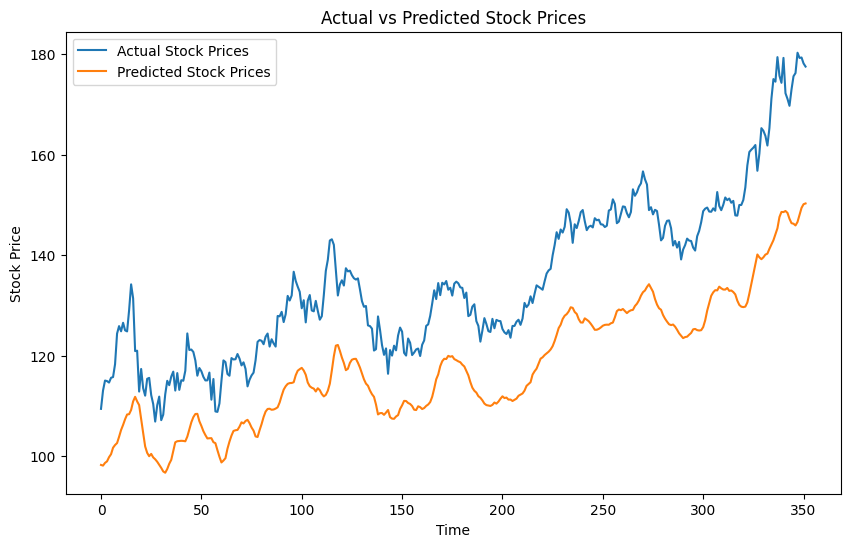

In [89]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_with_technical_indicators)

# X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()





In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    # rankdir='LR',
    expand_nested=False,
    dpi=75,
    show_layer_activations=False,
    show_trainable=False,
    # **kwargs
)

In [ ]:
# above exp uses all open, close, rma, ema features

In [90]:
y_train_pred = model.predict(X_train)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [92]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae, mse, rmse

(1.7032609982985691, 7.493656990277928, 2.7374544727315424)

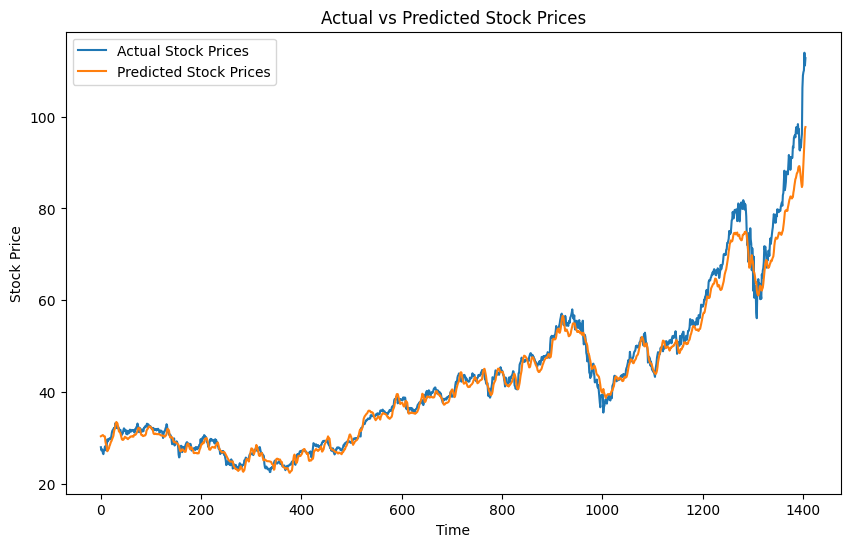

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Stock Prices')
plt.plot(y_train_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_47      │ (None, 1, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ input_layer_47[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_442         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_270 (Add)       │ (None, 1, 5)      │          0 │ dropout_442[0][0… │
│                     │                   │            │ input_layer_47[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_270[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_270 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_443         │ (None, 1, 3)      │          0 │ conv1d_270[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_271 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_443[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_271 (Add)       │ (None, 1, 5)      │          0 │ conv1d_271[0][0], │
│                     │                   │            │ add_270[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_271[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_445         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_272 (Add)       │ (None, 1, 5)      │          0 │ dropout_445[0][0… │
│                     │                   │            │ add_271[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_272[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_272 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_446         │ (None, 1, 3)      │          0 │ conv1d_272[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_273 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_446[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 1943.9556 - mape: 114.7504 - mean_squared_error: 1943.9556 - mean_squared_error_1: 1943.9556 - val_loss: 3126.7625 - val_mape: 77.9235 - val_mean_squared_error: 3126.7625 - val_mean_squared_error_1: 3126.7625
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 656.5186 - mape: 63.8260 - mean_squared_error: 656.5186 - mean_squared_error_1: 656.5186 - val_loss: 600.6651 - val_mape: 33.4757 - val_mean_squared_error: 600.6651 - val_mean_squared_error_1: 600.6651
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 154.5195 - mape: 26.9788 - mean_squared_error: 154.5195 - mean_squared_error_1: 154.5195 - val_loss: 11.7871 - val_mape: 3.2493 - val_mean_squared_error: 11.7871 - val_mean_squared_error_1: 11.7871
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 140.5154 - mape: 25.3872 - mean_squared_error: 140.5154 - mean_squared_error_1: 140.5154 - val_loss: 14.1336 - val_mape: 5.0052 - val_mean_squared_error: 14.1336 - val_mean_

/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Predicted Next Day's Closing Price: 29256.63863973168


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Absolute Error (MAE): 4.334137613123113
Mean Squared Error (MSE): 29.039432252151695
Root Mean Squared Error (RMSE): 5.388824756118137


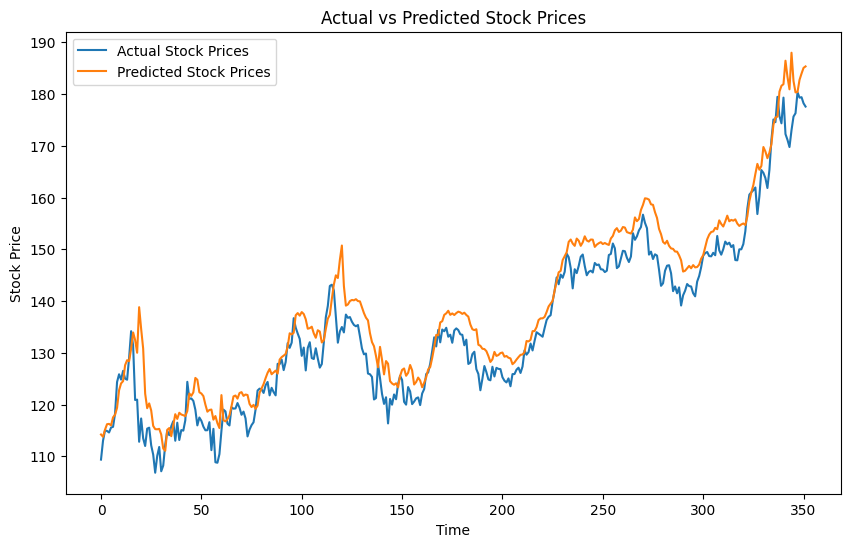

In [100]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i, 0])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_with_technical_indicators)

X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
 




In [ ]:
# above exp - using only close feature, output only next day price

In [96]:
y_train_pred = model.predict(X_train)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [98]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae, mse, rmse

(1.3335546545080237, 2.6573143998113875, 1.6301271115503193)

In [82]:
X.shape

(1758, 5)

[*********************100%%**********************]  1 of 1 completed


Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_38      │ (None, 1, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ input_layer_38[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_358         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_219 (Add)       │ (None, 1, 5)      │          0 │ dropout_358[0][0… │
│                     │                   │            │ input_layer_38[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_219[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_219 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_359         │ (None, 1, 3)      │          0 │ conv1d_219[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_220 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_359[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_220 (Add)       │ (None, 1, 5)      │          0 │ conv1d_220[0][0], │
│                     │                   │            │ add_219[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_220[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_361         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_221 (Add)       │ (None, 1, 5)      │          0 │ dropout_361[0][0… │
│                     │                   │            │ add_220[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_221[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_221 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_362         │ (None, 1, 3)      │          0 │ conv1d_221[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_222 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_362[0][0

 Total params: 95,873 (374.50 KB)

 Trainable params: 95,873 (374.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 1881.5020 - mape: 112.4949 - mean_squared_error: 1881.5020 - mean_squared_error_1: 1881.5020 - val_loss: 4533.5703 - val_mape: 93.8715 - val_mean_squared_error: 4533.5703 - val_mean_squared_error_1: 4533.5703
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1130.5861 - mape: 87.5026 - mean_squared_error: 1130.5861 - mean_squared_error_1: 1130.5861 - val_loss: 2482.3438 - val_mape: 68.9392 - val_mean_squared_error: 2482.3438 - val_mean_squared_error_1: 2482.3438
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 623.2432 - mape: 60.7341 - mean_squared_error: 623.2432 - mean_squared_error_1: 623.2432 - val_loss: 974.3599 - val_mape: 42.0409 - val_mean_squared_error: 974.3599 - val_mean_squared_error_1: 974.3599
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 245.2448 - mape: 34.4151 - mean_squared_error: 245.2448 - mean_squared_error_1: 245.2448 - val_loss: 181.7974 - val_mape: 15.7510 - val_mean_squared_error: 181.79

/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Predicted Next Day's Closing Price: 27717.674098852087


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Error (MAE): 4.114878323546842
Mean Squared Error (MSE): 28.12650964795065
Root Mean Squared Error (RMSE): 5.303443187962952


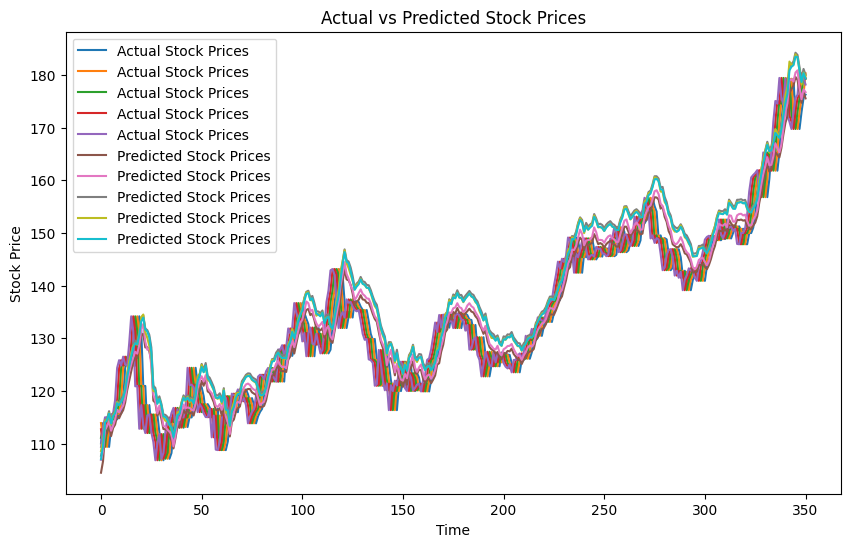

In [76]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)-5):
        X.append(scaled_data[i-n_context_days:i, 0])
        y.append(scaled_data[i:i+5, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_with_technical_indicators)

X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




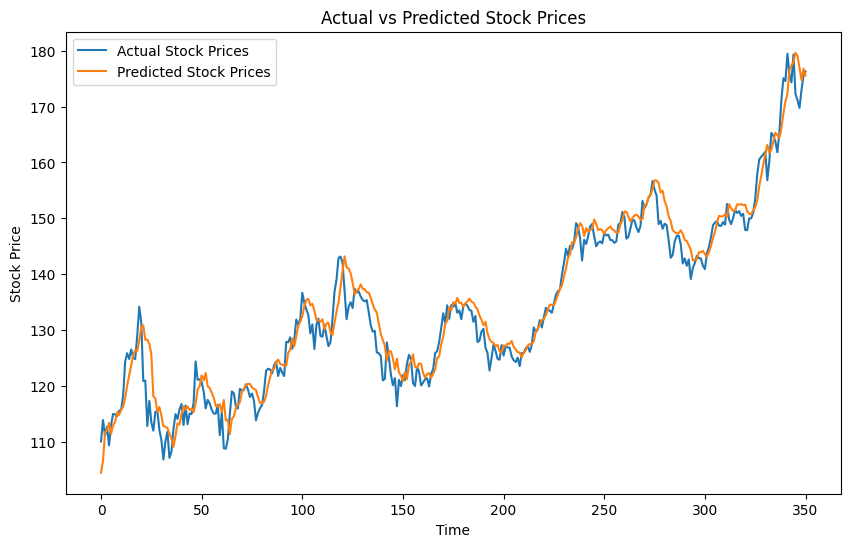

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:,0], label='Actual Stock Prices')
plt.plot(y_pred[:,0], label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# input features only close prices ; output next 5 days price

In [73]:
y_test[:,0].shape

(351,)

In [48]:
X.shape

(1748, 15)

In [32]:
y_pred

array([[0.30809242],
       [0.31243908],
       [0.31045467],
       [0.30165368],
       [0.2954921 ],
       [0.29166168],
       [0.28906143],
       [0.28689206],
       [0.28978366],
       [0.29006708],
       [0.28984872],
       [0.28217453],
       [0.27574843],
       [0.27020204],
       [0.27143922],
       [0.27218878],
       [0.27003437],
       [0.2649653 ],
       [0.2608863 ],
       [0.2912628 ],
       [0.2829252 ],
       [0.28919068],
       [0.29345125],
       [0.28840098],
       [0.3306053 ],
       [0.32990587],
       [0.337667  ],
       [0.34925407],
       [0.3656606 ],
       [0.3799724 ],
       [0.392267  ],
       [0.39578152],
       [0.39484262],
       [0.39371052],
       [0.39639807],
       [0.39187634],
       [0.3909639 ],
       [0.39216852],
       [0.39189744],
       [0.38461253],
       [0.3785578 ],
       [0.36115593],
       [0.3495537 ],
       [0.34781224],
       [0.33793345],
       [0.3434905 ],
       [0.34611315],
       [0.350

In [21]:
# data_with_technical_indicators

In [20]:
X_train.shape[1:]

(10, 5)

In [23]:
X_train.shape

(1402, 10, 5)

In [25]:
data_with_technical_indicators.shape

(1763, 10)

[*********************100%%**********************]  1 of 1 completed

check x_train (1, 5)



/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 200)            │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,901 (683.21 KB)

 Trainable params: 174,901 (683.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1383.7611 - mae: 36.0008 - mape: 98.4725 - val_loss: 3159.3665 - val_mae: 54.9892 - val_mape: 78.6054
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 709.1149 - mae: 25.7066 - mape: 70.7430 - val_loss: 697.6055 - val_mae: 25.7481 - val_mape: 36.7552
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112.7496 - mae: 9.4137 - mape: 26.0402 - val_loss: 197.8798 - val_mae: 13.5721 - val_mape: 19.5132
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.1587 - mae: 6.4406 - mape: 17.1577 - val_loss: 37.8563 - val_mae: 5.6433 - val_mape: 8.2066
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6338 - mae: 1.6831 - mape: 4.4793 - val_loss: 24.7754 - val_mae: 4.4380 - val_mape: 6.2348
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9727 - mae: 2.4820 - mape: 7.1196 - val_loss: 10.3149 - val_mae: 2.5973 - val_mape: 3.6406
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0061 - mae: 1.1670 - ma

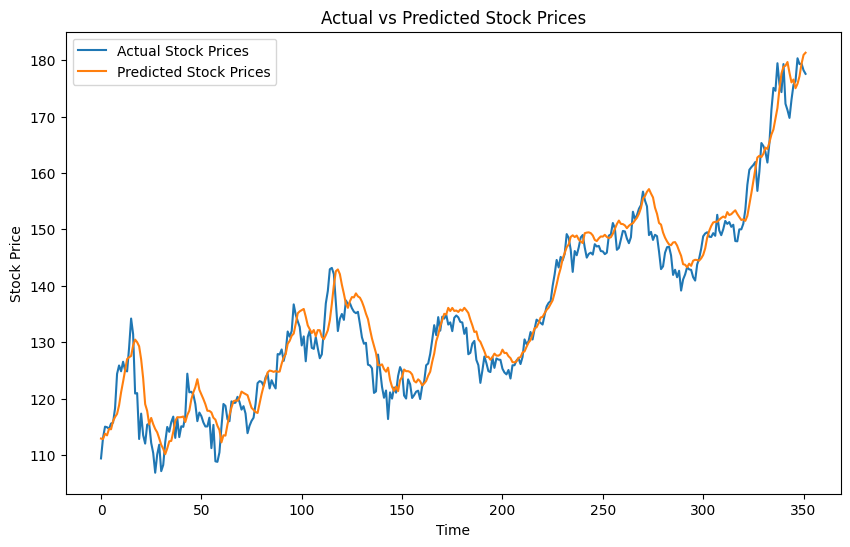

In [117]:
# ! pip install ta


# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i, 0])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler




def build_model(input_shape):
    
#     model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
#   model.add(Dense(50, activation='relu'))
#   model.add(Dense(n_outputs)
            
    model = Sequential([
        LSTM(units=200, activation='relu', input_shape=input_shape),
#         Dropout(0.2),
        Dense(units=50, activation='relu'),
#         Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae", "mape"])
    return model



def train_model(x_train, y_train):
    print("check x_train", x_train.shape[1:])
    input_shape = x_train.shape[1:]

    model = build_model(input_shape)
    
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model




# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_with_technical_indicators)

X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
 


In [ ]:
# News

In [118]:
!unzip stocktrend_prediction/ticker_data.zip

Archive:  stocktrend_prediction/ticker_data.zip
   creating: ticker_data/
   creating: ticker_data/sentiments/
 extracting: ticker_data/sentiments/GOOGL.xz  
 extracting: ticker_data/sentiments/TSLA.xz  
 extracting: ticker_data/sentiments/NFLX.xz  
 extracting: ticker_data/sentiments/META.xz  
 extracting: ticker_data/sentiments/AAPL.xz  
 extracting: ticker_data/sentiments/AMZN.xz  
 extracting: ticker_data/sentiments/MSFT.xz  
 extracting: ticker_data/sentiments/FB.xz  
   creating: ticker_data/embeddings/
  inflating: ticker_data/embeddings/GOOGL.xz  
  inflating: ticker_data/embeddings/TSLA.xz  
  inflating: ticker_data/embeddings/NFLX.xz  
 extracting: ticker_data/embeddings/META.xz  
  inflating: ticker_data/embeddings/AAPL.xz  
  inflating: ticker_data/embeddings/AMZN.xz  
  inflating: ticker_data/embeddings/MSFT.xz  
  inflating: ticker_data/embeddings/FB.xz  


In [120]:
# load embeddings
import lzma
import pickle

with lzma.open('ticker_data/embeddings/AAPL.xz') as rf:
    data = pickle.load(rf)


In [144]:
embedding_df = pd.DataFrame.from_dict(data, orient='index')
embedding_df.index = pd.to_datetime(embedding_df.index)

In [129]:
# load sentiment

import lzma
import pickle

with lzma.open('ticker_data/sentiments/AAPL.xz') as rf:
    sentiment_data = pickle.load(rf)


In [155]:
sentiment_df = pd.DataFrame.from_dict(sentiment_data, orient='index')
sentiment_df.index = pd.to_datetime(sentiment_df.index)

In [156]:
sentiment_df

,label,score
2020-06-11,positive,0.511585
2020-06-10,neutral,0.918866
2020-06-09,positive,0.881793
2020-06-08,neutral,0.838791
2020-06-05,neutral,0.751873
...,...,...
2016-07-08,neutral,0.972592
2016-07-07,neutral,0.898566
2016-07-06,neutral,0.596797
2016-07-05,neutral,0.998173


In [147]:
data_with_technical_indicators.shape

(1763, 10)

In [166]:
data_w_sentiment = data_with_technical_indicators.join(sentiment_df)

In [167]:
decay_factor = 0.9 

def apply_decay(df):
    
    series = df['score']
    mask = series.isna()
    # Calculate the distance since the last non-NaN value
    distance = mask.groupby((mask != mask.shift()).cumsum()).cumcount() + 1
    # Apply decay factor to the filled values
    decayed_values = series.ffill() * (decay_factor ** distance)
    
    df['decayed_score'] = decayed_values
    
    return np.where(df['score'].isna(), df['decayed_score'], df['score'])
    


data_w_sentiment['decayed_score'] = apply_decay(data_w_sentiment)


data_w_sentiment

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,SMA,MACD,label,score,decayed_score
Date,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435263,212818400,56.627120,27.332500,61.090626,0.000000,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000,56.627120,27.302304,61.090626,-0.061425,NaN,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749125,263188400,56.627120,27.273390,61.090626,-0.108650,NaN,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082136,160423600,56.627120,27.260218,61.090626,-0.114696,NaN,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007431,237458000,56.627120,27.288151,61.090626,-0.035562,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065674,74919600,66.534473,162.569367,174.859286,5.051209,NaN,NaN,8.114357e-19
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038712,79144300,59.995065,163.225078,175.438571,5.102919,NaN,NaN,7.302922e-19
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127594,62348900,55.848749,163.858604,175.745714,5.092459,NaN,NaN,6.572629e-19


In [168]:
data_w_sentiment['label'] = data_w_sentiment['label'].ffill()

In [171]:
data_w_sentiment['decayed_score'] = np.where(
    data_w_sentiment['label']=='neutral', 0, data_w_sentiment['decayed_score']
)

In [186]:
data_w_sentiment['decayed_score'] = np.where(
    data_w_sentiment['label']=='negative', -data_w_sentiment['decayed_score'], data_w_sentiment['decayed_score']
)

In [184]:
data_w_sentiment = data_w_sentiment.drop(columns=['score', 'label']).dropna()

In [ ]:
data_w_news

[*********************100%%**********************]  1 of 1 completed


Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_63      │ (None, 1, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ input_layer_63[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_475         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_286 (Add)       │ (None, 1, 5)      │          0 │ dropout_475[0][0… │
│                     │                   │            │ input_layer_63[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_286[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_286 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_476         │ (None, 1, 3)      │          0 │ conv1d_286[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_287 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_476[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_287 (Add)       │ (None, 1, 5)      │          0 │ conv1d_287[0][0], │
│                     │                   │            │ add_286[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_287[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_478         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_288 (Add)       │ (None, 1, 5)      │          0 │ dropout_478[0][0… │
│                     │                   │            │ add_287[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_288[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_288 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_479         │ (None, 1, 3)      │          0 │ conv1d_288[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_289 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_479[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - loss: 880.3397 - mape: 75.3947 - mean_squared_error: 880.3397 - mean_squared_error_1: 880.3397 - val_loss: 853.9811 - val_mape: 40.5099 - val_mean_squared_error: 853.9811 - val_mean_squared_error_1: 853.9811
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 217.4723 - mape: 31.9688 - mean_squared_error: 217.4723 - mean_squared_error_1: 217.4723 - val_loss: 6.8020 - val_mape: 2.3940 - val_mean_squared_error: 6.8020 - val_mean_squared_error_1: 6.8020
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 125.3801 - mape: 24.5807 - mean_squared_error: 125.3801 - mean_squared_error_1: 125.3801 - val_loss: 34.4987 - val_mape: 8.2784 - val_mean_squared_error: 34.4987 - val_mean_squared_error_1: 34.4987
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 105.8475 - mape: 22.8869 - mean_squared_error: 105.8475 - mean_squared_error_1: 105.8475 - val_loss: 9.4432 - val_mape: 3.5134 - val_mean_squared_error: 9.4432 - val_mean_squared_error_1:

/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Predicted Next Day's Closing Price: 28680.453931899738


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step  
Mean Absolute Error (MAE): 2.743355014107444
Mean Squared Error (MSE): 12.688472780434411
Root Mean Squared Error (RMSE): 3.562088261179727


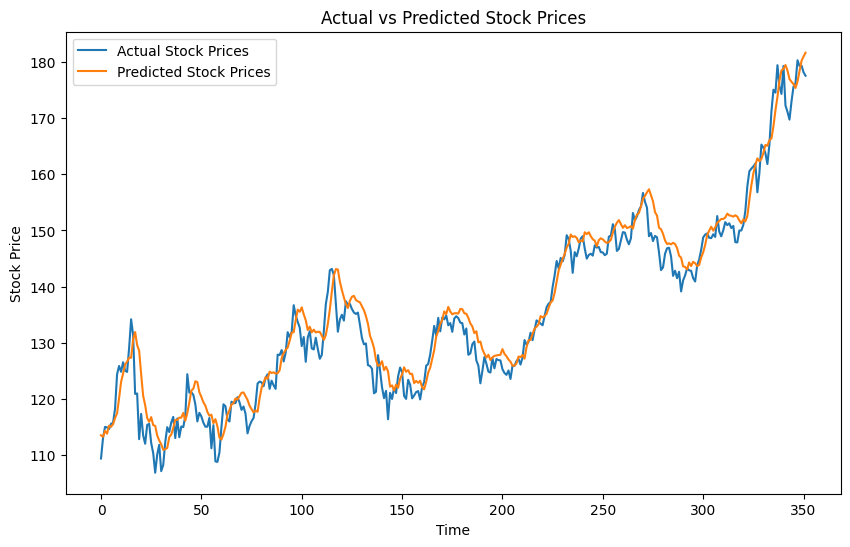

In [153]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i, 0])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)
data_w_news = data_with_technical_indicators.join(embedding_df)
data_w_news = data_w_news.fillna(0)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_w_news)

X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
 



In [143]:
# above exp - financial + news data ; close price output is only next day price

[*********************100%%**********************]  1 of 1 completed


Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_64      │ (None, 5, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ input_layer_64[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_488         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_294 (Add)       │ (None, 5, 5)      │          0 │ dropout_488[0][0… │
│                     │                   │            │ input_layer_64[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_294[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_294 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_489         │ (None, 5, 3)      │          0 │ conv1d_294[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_295 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_489[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_295 (Add)       │ (None, 5, 5)      │          0 │ conv1d_295[0][0], │
│                     │                   │            │ add_294[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_295[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_491         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_296 (Add)       │ (None, 5, 5)      │          0 │ dropout_491[0][0… │
│                     │                   │            │ add_295[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_296[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_296 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_492         │ (None, 5, 3)      │          0 │ conv1d_296[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_297 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_492[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 692.5740 - mape: 64.0358 - mean_squared_error: 692.5740 - mean_squared_error_1: 692.5740 - val_loss: 828.4550 - val_mape: 37.9864 - val_mean_squared_error: 828.4550 - val_mean_squared_error_1: 828.4550
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 210.0245 - mape: 31.5507 - mean_squared_error: 210.0245 - mean_squared_error_1: 210.0245 - val_loss: 100.6504 - val_mape: 9.5650 - val_mean_squared_error: 100.6504 - val_mean_squared_error_1: 100.6504
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 169.2134 - mape: 30.5331 - mean_squared_error: 169.2134 - mean_squared_error_1: 169.2134 - val_loss: 138.1177 - val_mape: 13.2040 - val_mean_squared_error: 138.1177 - val_mean_squared_error_1: 138.1177
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 123.0370 - mape: 24.7979 - mean_squared_error: 123.0370 - mean_squared_error_1: 123.0370 - val_loss: 251.3851 - val_mape: 20.0859 - val_mean_squared_error: 251.3851 

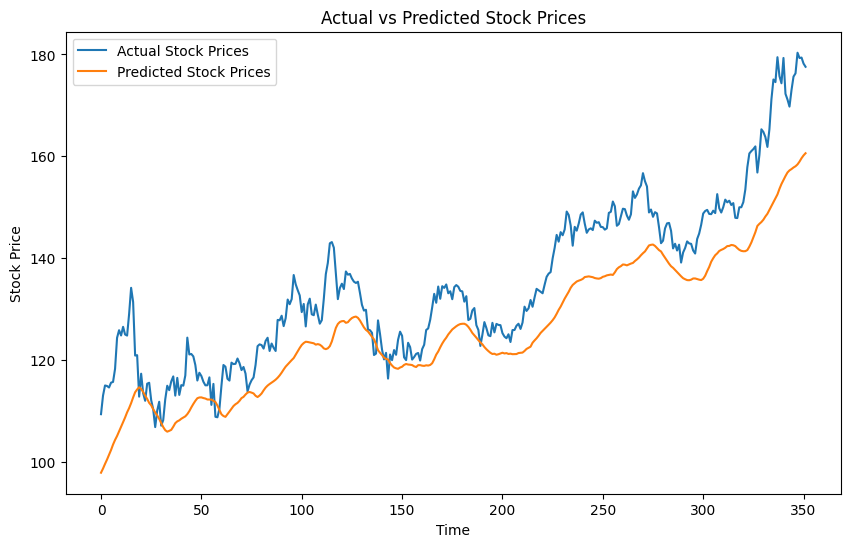

In [154]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
data_with_technical_indicators = compute_technical_indicators(data)
data_w_news = data_with_technical_indicators.join(embedding_df)
data_w_news = data_w_news.fillna(0)

# Check for missing values after computing technical indicators
if data_with_technical_indicators.isnull().values.any():
    print("There are missing values after computing technical indicators. Please handle them appropriately.")
    exit()

# Prepare data
X, y, scaler = prepare_data(data_w_news)

# X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()






In [ ]:
# above exp: all finanical + news



[*********************100%%**********************]  1 of 1 completed


Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_65      │ (None, 1, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ input_layer_65[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_501         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_302 (Add)       │ (None, 1, 5)      │          0 │ dropout_501[0][0… │
│                     │                   │            │ input_layer_65[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_302[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_302 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_502         │ (None, 1, 3)      │          0 │ conv1d_302[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_303 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_502[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_303 (Add)       │ (None, 1, 5)      │          0 │ conv1d_303[0][0], │
│                     │                   │            │ add_302[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_303[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_504         │ (None, 1, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_304 (Add)       │ (None, 1, 5)      │          0 │ dropout_504[0][0… │
│                     │                   │            │ add_303[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5)      │         10 │ add_304[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_304 (Conv1D) │ (None, 1, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_505         │ (None, 1, 3)      │          0 │ conv1d_304[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_305 (Conv1D) │ (None, 1, 5)      │         20 │ dropout_505[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 1013.7968 - mape: 66.8386 - mean_squared_error: 1013.7968 - mean_squared_error_1: 1013.7968 - val_loss: 1749.0135 - val_mape: 43.8955 - val_mean_squared_error: 1749.0135 - val_mean_squared_error_1: 1749.0135
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 360.0638 - mape: 35.7745 - mean_squared_error: 360.0638 - mean_squared_error_1: 360.0638 - val_loss: 194.4470 - val_mape: 13.9271 - val_mean_squared_error: 194.4470 - val_mean_squared_error_1: 194.4470
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 138.8478 - mape: 21.0232 - mean_squared_error: 138.8478 - mean_squared_error_1: 138.8478 - val_loss: 21.9763 - val_mape: 4.6913 - val_mean_squared_error: 21.9763 - val_mean_squared_error_1: 21.9763
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 175.2007 - mape: 24.5240 - mean_squared_error: 175.2007 - mean_squared_error_1: 175.2007 - val_loss: 18.3726 - val_mape: 4.1429 - val_mean_squared_error: 18.3726 - val_mean_

/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
Predicted Next Day's Closing Price: 28130.03854168567


/afs/cs.pitt.edu/usr0/ars539/miniconda3/envs/biology-venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Mean Absolute Error (MAE): 2.257353359181098
Mean Squared Error (MSE): 8.602969036914159
Root Mean Squared Error (RMSE): 2.9330818326317045


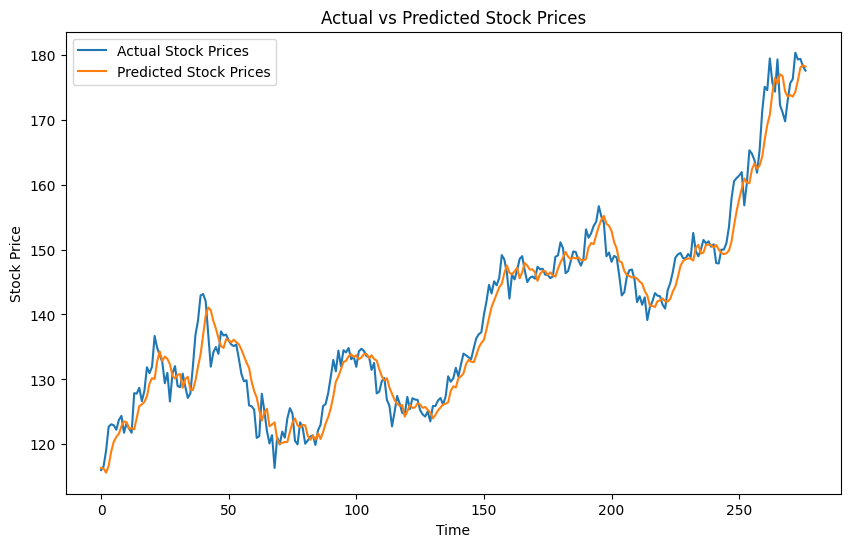

In [190]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i, 0])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)

# Compute technical indicators
# data_with_technical_indicators = compute_technical_indicators(data)
# data_w_news = data_with_technical_indicators.join(embedding_df)
# data_w_news = data_w_news.fillna(0)

# Check for missing values after computing technical indicators
# if data_with_technical_indicators.isnull().values.any():
#     print("There are missing values after computing technical indicators. Please handle them appropriately.")
#     exit()

# Prepare data
X, y, scaler = prepare_data(data_w_sentiment)

X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
 




In [ ]:
# above exp financial close + sentiment

[*********************100%%**********************]  1 of 1 completed


Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_66      │ (None, 5, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ input_layer_66[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_514         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_310 (Add)       │ (None, 5, 5)      │          0 │ dropout_514[0][0… │
│                     │                   │            │ input_layer_66[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_310[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_310 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_515         │ (None, 5, 3)      │          0 │ conv1d_310[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_311 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_515[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_311 (Add)       │ (None, 5, 5)      │          0 │ conv1d_311[0][0], │
│                     │                   │            │ add_310[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_311[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 5)      │     23,557 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_517         │ (None, 5, 5)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_312 (Add)       │ (None, 5, 5)      │          0 │ dropout_517[0][0… │
│                     │                   │            │ add_311[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 5)      │         10 │ add_312[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_312 (Conv1D) │ (None, 5, 3)      │         18 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_518         │ (None, 5, 3)      │          0 │ conv1d_312[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_313 (Conv1D) │ (None, 5, 5)      │         20 │ dropout_518[0][0

 Total params: 95,357 (372.49 KB)

 Trainable params: 95,357 (372.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 604.1502 - mape: 45.1299 - mean_squared_error: 604.1502 - mean_squared_error_1: 604.1502 - val_loss: 1349.4425 - val_mape: 35.6235 - val_mean_squared_error: 1349.4425 - val_mean_squared_error_1: 1349.4425
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 229.7303 - mape: 28.5288 - mean_squared_error: 229.7303 - mean_squared_error_1: 229.7303 - val_loss: 347.6113 - val_mape: 14.9198 - val_mean_squared_error: 347.6113 - val_mean_squared_error_1: 347.6113
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 240.7791 - mape: 30.5091 - mean_squared_error: 240.7791 - mean_squared_error_1: 240.7791 - val_loss: 390.0826 - val_mape: 17.1708 - val_mean_squared_error: 390.0826 - val_mean_squared_error_1: 390.0826
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 181.6732 - mape: 25.1561 - mean_squared_error: 181.6732 - mean_squared_error_1: 181.6732 - val_loss: 547.4591 - val_mape: 22.1077 - val_mean_squared_error: 547.4

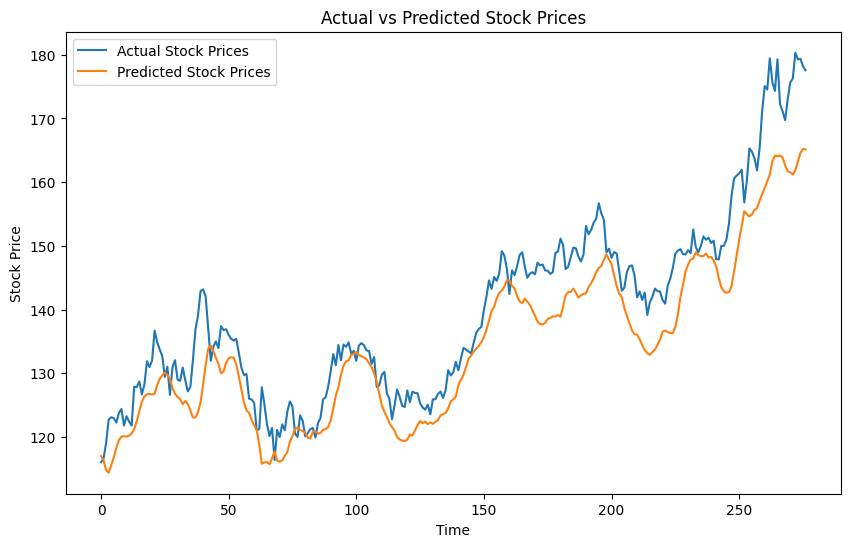

In [191]:
# ! pip install ta

import keras
from keras import layers
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, span=50):
    return data.ewm(span=span, adjust=False).mean()

def calculate_sma(data, window=14):
    return data.rolling(window=window).mean()

def calculate_macd(data, span_short=12, span_long=26):
    ema_short = calculate_ema(data, span=span_short)
    ema_long = calculate_ema(data, span=span_long)
    return ema_short - ema_long

    

def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss


def compute_technical_indicators(data):
    # Compute RSI
    data['RSI'] = calculate_rsi(data['Close'], period=14)

    # Compute EMA
    data['EMA'] = calculate_ema(data['Close'], span=50)

    # Compute SMA
    data['SMA'] = calculate_sma(data['Close'], window=14)

    # Compute MACD
    data['MACD'] = calculate_macd(data['Close'], span_short=12, span_long=26)

    # Handle missing values by filling with the mean of each column
    data_filled = data.fillna(data.mean())

    return data_filled

# Step 3: Prepare data
def prepare_data(data, n_context_days = 5):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']])
    scaled_data = data[['Close', 'RSI', 'EMA', 'SMA', 'MACD']].values
    X, y = [], []
    for i in range(n_context_days, len(data)):
        X.append(scaled_data[i-n_context_days:i])
        y.append(scaled_data[i, 0])  # Closing price
    X, y = np.array(X), np.array(y)
    return X, y, scaler


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
#     inputs = tf.expand_dims(inputs, axis=1)
#     print(inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    
#     n_timesteps, n_features, n_outputs = 5, 1, 5
    inputs = keras.Input(shape=(input_shape))
    
#     print("input_shape",inputs.shape)
    
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=3,
        num_transformer_blocks=4,
        mlp_units=[128],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mean_squared_error", "mean_squared_error", "mape"],
    )
    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    model.fit(
        x_train,
        y_train,
#         validation_data=(x_test, y_test),
        validation_split=0.2,
        epochs=25,
        batch_size=128,
        callbacks=callbacks,
    )
    return model


# Step 7: Predict next day's closing price
def predict_next_day_price(model, last_data_point, scaler):
    last_data_point = last_data_point.reshape((1, last_data_point.shape[0], last_data_point.shape[1]))
    predicted_scaled_price = model.predict(last_data_point)
    predicted_price = scaler.inverse_transform([[predicted_scaled_price[0][0], 0, 0, 0, 0]])[0][0]
    return predicted_price



# Fetch data
symbol = 'AAPL'  # Example symbol
start_date = '2015-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(symbol, start_date, end_date)


# Prepare data
X, y, scaler = prepare_data(data_w_sentiment)

# X = X.reshape(X.shape[0], 1, X.shape[-1])
# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = train_model(X_train, y_train, X_test, y_test)

# Evaluate model
# loss = evaluate_model(model, X_test, y_test)
print("Test Loss:", loss)  # Test loss: Represents the average loss (error) between the predicted values and the actual values. Lower values indicate better performance.
# Predict next day's closing price
last_data_point = X_test[-1]
next_day_price = predict_next_day_price(model, last_data_point, scaler)
print("Predicted Next Day's Closing Price:", next_day_price)


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Mean Absolute Error (MAE):", mae)  # Mean Absolute Error (MAE): Average magnitude of the errors in the predictions. Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse)  # Mean Squared Error (MSE): Average of the squared differences between the predicted values and the actual values. Lower values indicate better performance.
print("Root Mean Squared Error (RMSE):", rmse)  # Root Mean Squared Error (RMSE): Standard deviation of the residuals (prediction errors). Lower values indicate better performance.

# Visualize model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()







In [ ]:
# transformers


# financial (close) ; using only close feature, output only next day price
Mean Absolute Error (MAE): 4.334137613123113
Mean Squared Error (MSE): 29.039432252151695
Root Mean Squared Error (RMSE): 5.388824756118137
    
    
    
# financial (close) + news data ; close price output is only next day price
Mean Absolute Error (MAE): 2.743355014107444
Mean Squared Error (MSE): 12.688472780434411
Root Mean Squared Error (RMSE): 3.562088261179727

    
# all financial
Mean Absolute Error (MAE): 16.880988359451294
Mean Squared Error (MSE): 309.14230541645105
Root Mean Squared Error (RMSE): 17.5824431014706
    
    
#  all finanical + news
Mean Absolute Error (MAE): 8.653478340669112
Mean Squared Error (MSE): 101.70793979023455
Root Mean Squared Error (RMSE): 10.085035438224029
    
    
    
#  financial close + sentiment
Mean Absolute Error (MAE): 2.257353359181098
Mean Squared Error (MSE): 8.602969036914159
Root Mean Squared Error (RMSE): 2.9330818326317045

    

#  all financial  + sentiment
Mean Absolute Error (MAE): 5.52126697857027
Mean Squared Error (MSE): 45.17546689611988
Root Mean Squared Error (RMSE): 6.721269738384249